In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [8]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"

In [9]:
from sklearn.datasets import load_boston

In [10]:
boston = load_boston()
data = boston["data"]


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
target = boston["target"]
Y = pd.DataFrame(target, columns = ['price'])
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [14]:
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

Y_train_scaled = pd.DataFrame(scaler.fit_transform(Y_train), columns = Y_train.columns)
Y_test_scaled = pd.DataFrame(scaler.fit_transform(Y_test), columns = Y_test.columns)


In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

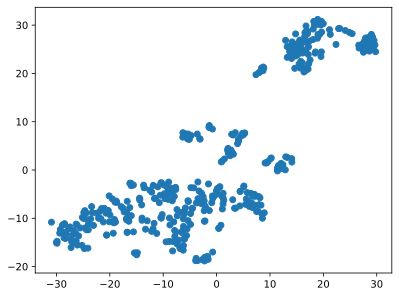

In [28]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

In [29]:
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters = 3, random_state = 42, max_iter = 100)
labels_train = model.fit_predict(X_train_scaled)
                

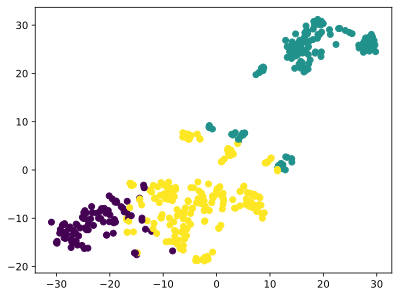

In [31]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

In [32]:
print('First cluster:' , X_train['CRIM'][labels_train == 0].mean())
print('Second cluster:', X_train['CRIM'][labels_train == 1].mean())
print('Third cluster:', X_train['CRIM'][labels_train == 2].mean())


First cluster: 0.07356558139534886
Second cluster: 10.797028425196853
Third cluster: 0.42166020942408367


In [34]:
print('Первый кластер: ', Y_train[labels_train == 0].mean())
print('Второй кластер:', Y_train[labels_train == 1].mean())
print('Третий кластер:', Y_train[labels_train == 2].mean())

ValueError: Item wrong length 404 instead of 102.

In [35]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

X_test_tsne = tsne.fit_transform(X_test_scaled)

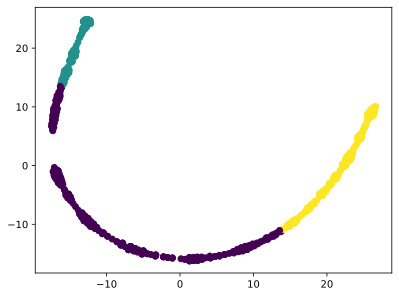

In [40]:
labels_test = model.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [101]:
print('First cluster:' , X_train['CRIM'][labels_train == 0].mean())
print('Second cluster:', X_train['CRIM'][labels_train == 1].mean())
print('Third cluster:', X_train['CRIM'][labels_train == 2].mean())

First cluster: 0.07356558139534886
Second cluster: 10.797028425196853
Third cluster: 0.42166020942408367
